walking_gabriel.txt


<ipython-input-31-f28d5a82f4a9>:33: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  values = np.fromstring(columns[2].strip(), dtype=float, sep='\t')


walking_rita.txt
walking_solrun.txt
walking_oscar.txt


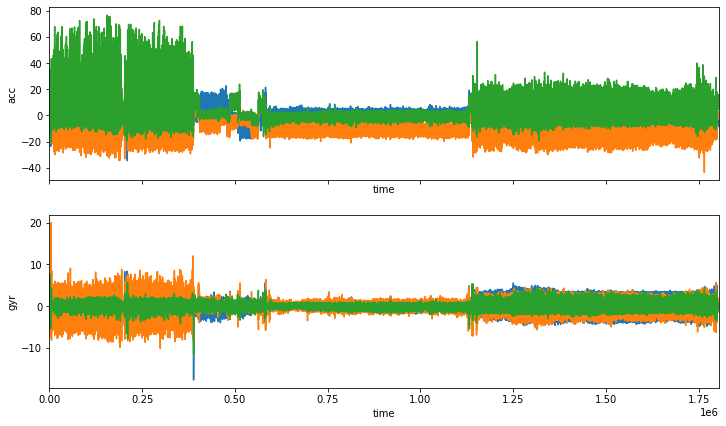

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import os 


data_type = "walking"

current_path = os.path.abspath('.')
standing_path = os.path.join(current_path, data_type)
data_dict = {'ACC': {'time': [], 'values': []},
             'GYR': {'time': [], 'values': []}}
time_start = 0
for file in os.listdir(standing_path):
    print(file)
    file_path = os.path.join(standing_path, file)
    with open(file_path) as f:
        last_line = len(f.readlines()) - 1
    with open(file_path) as f:
        for i, line in enumerate(f):
            columns = line.split('\t', 2)
            time_stamp = int(columns[0])
            if i == 0:
                offset = time_stamp
                time_stamp = time_start
            else:
                time_stamp += time_start - offset
            
            if i == last_line:
                time_start = time_stamp
 
            key = columns[1]
            values = np.fromstring(columns[2].strip(), dtype=float, sep='\t')
            if key in data_dict.keys():
                data_dict[key]['time'].append(time_stamp)
                data_dict[key]['values'].append(values)
        # pprint(data_dict['ACC']['values'][:10])
        # pprint(data_dict['GYR']['values'][:10])
        # pprint(len(data_dict['ACC']['time']))
        # pprint(len(data_dict['GYR']['time']))

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(12, 7))
ax[0].plot(data_dict['ACC']['time'], np.array(data_dict['ACC']['values']))
ax[0].set_xlabel('time')
ax[0].set_ylabel('acc')
ax[0].margins(x=0)
ax[1].plot(data_dict['GYR']['time'], np.array(data_dict['GYR']['values']))
ax[1].set_xlabel('time')
ax[1].set_ylabel('gyr')
ax[1].margins(x=0)
plt.show()